In [2]:
import pandas as pd
import geopandas as gpd
import os
import glob
import numpy as np
from matplotlib import pyplot as plt

## Exploratory Data Analysis

In [3]:
# Setup the project repository
loc = 'C:/Users/Archolic/Desktop/4.453'
os.chdir(loc)
footprint_dir = glob.glob("batch footprint/*.shp")
tree_dir = glob.glob("tree data/*.shp")

building_join_dir = glob.glob("building_frames/*.geojson")
tree_join_dir = glob.glob("tree_frames/*.geojson")

In [4]:
# Helper Function for Visualizing Progress
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))
    
    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [5]:
# We load the first 100 buildings and tree clusters for data exploration
data_raw = []

n_samples = 100

for filename in footprint_dir[:10]:
    cur_gdf = gpd.read_file(filename)
    cur_gdf
    data_raw.append(cur_gdf)

In [6]:
tree_data_raw = []

for tree in tree_dir[:10]:
    cur_gdf_t = gpd.read_file(tree)
    tree_data_raw.append(cur_gdf_t)

In [7]:
data_raw[3]['MAX_PART_F']

0         5
1         1
2         3
3      None
4      None
       ... 
101    None
102    None
103    None
104    None
105    None
Name: MAX_PART_F, Length: 106, dtype: object

In [8]:
building_df = gpd.GeoDataFrame(data_raw)
data_raw[0].columns

Index(['BUILDING_I', 'MAX_PARCEL', 'MAX_ADDRES', 'MAX_PART_A', 'MAX_PART_I',
       'MAX_PART_U', 'MAX_PART_B', 'MAX_PART_C', 'MAX_PART_S', 'MAX_PART_V',
       'SUM_PART_F', 'SUM_PART_R', 'MEAN_PART_', 'MAX_PART_F', 'SUM_PART_G',
       'MEAN_PART1', 'MEAN_PAR_1', 'MIN_GROUND', 'MEAN_ROOF_', 'MEAN_BUILD',
       'MAX_IEL_TY', 'MIN_BASE_E', 'MEAN_ELEVA', 'MAX_TOP_SE', 'MEAN_ELE_1',
       'MAX_TOP_GR', 'SUM_Shape_', 'SUM_Shape1', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

In [9]:
tree_data_raw[0]

,OBJECTID,TYPE,geometry
0,52388,Tree in Park,POINT (230492.278 902518.347)
1,52389,Tree in Park,POINT (230507.139 902521.382)
2,52390,Tree in Park,POINT (230517.986 902513.184)
3,52391,Tree in Park,POINT (230537.842 902524.736)
4,52392,Tree in Park,POINT (230553.008 902527.142)
5,52393,Tree in Park,POINT (230506.797 902504.309)


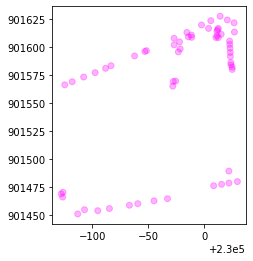

In [10]:
# We can plot the tree by its function: tree in park vs not
tree_data_raw[6].plot(alpha = 0.3, cmap = 'spring', column = 'TYPE')

In [12]:
parcel = gpd.read_file('parcel_data/parcel_data.geojson')

In [22]:
parcel.iloc[0,:]

STATEFP10                                                    25
COUNTYFP10                                                  001
TRACTCE10                                                010208
BLOCKCE10                                                  1101
GEOID10                                         250010102081101
NAME10                                               Block 1101
MTFCC10                                                   G5040
ALAND10                                                   46622
AWATER10                                                      0
INTPTLAT10                                          +42.0103839
INTPTLON10                                         -070.0672813
AREA_SQFT                                                501798
AREA_ACRES                                              11.5197
REALTOWN                                                  Truro
TOWN_ID                                                     300
COUSUBFP10                              

In [24]:
parcel.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
#find the containing block inside the parcel geojson files and save to disk
building_data = []
building_total = len(data_raw)

for idx, buildings in enumerate(data_raw[:10]):
    bd_joined = gpd.sjoin(parcel,buildings,how='right', op='contains')
    bd_joined.to_file('C:/Users/Archolic/Desktop/4.453/building_frames/building'+str(idx)+'.geojson')
    building_data.append(bd_joined)
    time.sleep(0.1) #Replace this with a real computation
    update_progress(idx / building_total)

Progress: [##################--] 90.0%


In [14]:
#find the containing tree block inside the parcel geojson files and save to disk
tree_data = []

for idx, trees in enumerate(tree_data_raw[:10]):
    tr_joined = gpd.sjoin(parcel,trees,how='right', op='contains')
    tr_joined.to_file('C:/Users/Archolic/Desktop/4.453/tree_frame/tree'+str(idx)+'.geojson')
    tree_data.append(tr_joined)
    time.sleep(0.1) #Replace this with a real computation
    update_progress(idx /len(tree_data_raw))

C:\Users\Archolic\Anaconda3\envs\mmgan\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!(epsg:4326 != epsg:26986)
  "(%s != %s)" % (left_df.crs, right_df.crs)


DriverError: Failed to create directory C:/Users/Archolic/Desktop/4.453/tree_frame/tree0.geojson for shapefile datastore.

In [68]:
parcel.to_file('C:/Users/Archolic/Desktop/4.453/parcel_data/parcel_data.geojson')

Exception ignored in: <function PreparedGeometry.__del__ at 0x000001B23B338310>
Traceback (most recent call last):
  File "C:\Users\Archolic\Anaconda3\envs\mmgan\lib\site-packages\shapely\prepared.py", line 34, in __del__
    if self.__geom__ is not None:
AttributeError: 'PreparedGeometry' object has no attribute '__geom__'


## Load Dataset and Feature Engineering

The urban dataset will be loaded into the geojson object on which we can perform a series of future feature engineering.

In [15]:
parcel.columns
inventory = {}
print(building_data[0].columns)
for building in building_data:
    inventory[building['GEOID10'][0]] =[building]

Index(['index_left', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLOCKCE10',
       'GEOID10', 'NAME10', 'MTFCC10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'AREA_SQFT', 'AREA_ACRES', 'REALTOWN', 'TOWN_ID',
       'COUSUBFP10', 'POP100_RE', 'HU100_RE', 'LOGPL94171', 'LOGSF1',
       'LOGSF1C', 'SHAPE_AREA', 'SHAPE_LEN', 'BUILDING_I', 'MAX_PARCEL',
       'MAX_ADDRES', 'MAX_PART_A', 'MAX_PART_I', 'MAX_PART_U', 'MAX_PART_B',
       'MAX_PART_C', 'MAX_PART_S', 'MAX_PART_V', 'SUM_PART_F', 'SUM_PART_R',
       'MEAN_PART_', 'MAX_PART_F', 'SUM_PART_G', 'MEAN_PART1', 'MEAN_PAR_1',
       'MIN_GROUND', 'MEAN_ROOF_', 'MEAN_BUILD', 'MAX_IEL_TY', 'MIN_BASE_E',
       'MEAN_ELEVA', 'MAX_TOP_SE', 'MEAN_ELE_1', 'MAX_TOP_GR', 'SUM_Shape_',
       'SUM_Shape1', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


In [16]:
for tree in tree_data:
    inventory.get(tree['GEOID10'][0],[]).append(tree)

1000


In [ ]:
parcel = gpd.read_file('parcel.geojson')

In [23]:
building_data[idx].to_csv('example.csv')

C:\Users\Archolic\Anaconda3\envs\mmgan\lib\site-packages\geopandas\base.py:48: UserWarning: GeoSeries crs mismatch: epsg:4326 and None
  warn("GeoSeries crs mismatch: {0} and {1}".format(this.crs, other.crs))


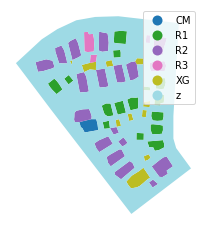

In [37]:
idx = 4
geoid = building_data[idx]['GEOID10'][0]
a = gpd.GeoDataFrame(parcel[parcel['GEOID10']==geoid])
res_union = gpd.overlay(inventory[geoid][0], a, how='union').fillna('z')
#tree_union = gpd.overlay(inventory[geoid][1], res_union, how='union').fillna('z')
#try plotting by building function
plot = res_union.plot(alpha = 1, cmap = 'tab20',column = 'MAX_PART_U',legend=True)
#tree_union.plot(alpha = 0.3, cmap = 'RdYlBu')
plt.axis('off')
plt.show()

In [3]:
type(res_union)

NameError: name 'res_union' is not defined

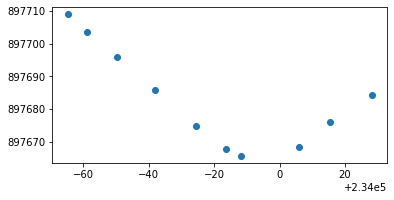

In [151]:
tree_union.plot()

In [88]:
tree_data[0]

,index_left,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,ALAND10,AWATER10,...,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGSF1C,SHAPE_AREA,SHAPE_LEN,OBJECTID,TYPE,geometry
0,130871,25,025,000100,1000,250250001001000,Block 1000,G5040,5977.0,0.0,...,0,0,0186875,137792,0137792,5976.523912,1080.38539,52388,Tree in Park,POINT (230492.278 902518.347)
1,130871,25,025,000100,1000,250250001001000,Block 1000,G5040,5977.0,0.0,...,0,0,0186875,137792,0137792,5976.523912,1080.38539,52389,Tree in Park,POINT (230507.139 902521.382)
2,130871,25,025,000100,1000,250250001001000,Block 1000,G5040,5977.0,0.0,...,0,0,0186875,137792,0137792,5976.523912,1080.38539,52390,Tree in Park,POINT (230517.986 902513.184)
3,130871,25,025,000100,1000,250250001001000,Block 1000,G5040,5977.0,0.0,...,0,0,0186875,137792,0137792,5976.523912,1080.38539,52391,Tree in Park,POINT (230537.842 902524.736)
4,130871,25,025,000100,1000,250250001001000,Block 1000,G5040,5977.0,0.0,...,0,0,0186875,137792,0137792,5976.523912,1080.38539,52392,Tree in Park,POINT (230553.008 902527.142)
5,130871,25,025,000100,1000,250250001001000,Block 1000,G5040,5977.0,0.0,...,0,0,0186875,137792,0137792,5976.523912,1080.38539,52393,Tree in Park,POINT (230506.797 902504.309)


In [60]:
def get_overlay(parcel_df, building_df, tree_df, n_samples):
    batch = []
    for idx in range(0,n_samples):
        print(idx)
        try:
            pid = int(building_df[idx]['index_left'][idx])
            a = gpd.GeoDataFrame(parcel_df.iloc[pid].values.reshape(1,-1), columns = parcel.columns, index = [idx])
            res_union = gpd.overlay(building_df[idx], a, how='union').fillna('z')
            #res_union = gpd.overlay(tree_df[idx], res_union_temp, how='union')
            batch.append(res_union)
            with open('C:/Users/Archolic/Desktop/4.453/joined_data/joined_frame'+str(idx)+'.geojson', 'w') as f:
                f.write(res_union.to_json())
        except KeyError or ValueError:
            pass
    return batch

merged = get_overlay(parcel, building_data, tree_data,len(building_data))

0


C:\Users\Archolic\Anaconda3\envs\mmgan\lib\site-packages\geopandas\base.py:48: UserWarning: GeoSeries crs mismatch: epsg:4326 and None
  warn("GeoSeries crs mismatch: {0} and {1}".format(this.crs, other.crs))


ValueError: setting an array element with a sequence.

In [ ]:
tree_frame = []


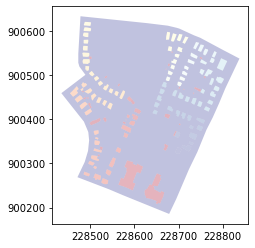

In [44]:
merged[3].plot(alpha = 0.3, cmap = 'RdYlBu')

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
merged[0].plot(ax=ax1, alpha = 0.3, cmap = 'RdYlBu')
merged[1].plot(ax=ax2, alpha = 0.3, cmap = 'RdYlBu')
ax1.axis('off')
ax2.axis('off')
plt.show()


In [ ]:
for i in range(28):
    merged[i].fillna(0)
    merged[i].plot(alpha = 0.3, cmap = 'RdYlBu',column = 'MAX_PART_U')
    plt.axis('off')

plt.show()

In [ ]:
    
    tree_joined = gpd.sjoin(parcel,buildings,how='right', op='contains')
    tree_data.append(tree_joined)

In [ ]:
# nrows=4
# ncols=8

# fig, axs = plt.subplots(nrows, ncols, figsize = (50,50))
# for idx in range(nrows*ncols - 1):
#     print(idx)
#     try:
#         merged[idx].plot(ax=axs[idx], alpha = 0.3, cmap = 'RdYlBu')
#         axs[idx].axis('off')
#         plt.show()
#         #splot.plot([1,2,3],[4,5,56])
#     except AttributeError:
#         pass


In [ ]:
res_union.iloc[-1].geometry